In [79]:
import matplotlib.pyplot as plt
import numpy as np
import vallog as vl

from de import Diver
import objectives

# Create sample Data for 2D example plots

In [80]:
parameter_space = [[0,100], [0,100]]
obj_func = objectives.gaussian
NP = 10

diver = Diver(parameter_space, obj_func, population_size=NP)




                        
                        Diver configuration
[Info]                  Population size: 10
[Info]                  Objective function: gaussian
[Info]                  Convergence threshold: 0.001
[Info]                  Max Iterations: 1000



In [81]:
populations, improvements, update_times = diver.run()

[Info]                  target: select_target_random
[Info]                  mutation scheme: mutation_simple with
                        [('mutation_scale_factor', 0.8)]
                        
                        Differential Evolution has
                        finished with
[Info]                  153 generations
[Info]                  best final vector: [47.97074778931571,
                        52.02733092306436]





# Create a canvas for the given parameter space

In [82]:
y = list(np.linspace(parameter_space[1][0], parameter_space[1][1], 100))
x = list(np.linspace(parameter_space[0][0], parameter_space[0][1], 100))
X, Y = np.meshgrid(x, y)

obj_func_vectorized = np.vectorize(lambda x, y: obj_func([x, y]))
Z = obj_func_vectorized(X, Y)

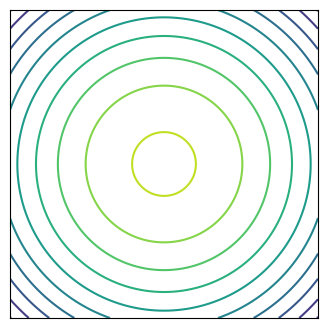

In [83]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

def create_canvas(fig: plt.Figure, ax: plt.Axes) -> None:
    """display the parameter space and some likelihood contours"""
    ax.set_ylim(parameter_space[0][0], parameter_space[0][1])
    ax.set_xlim(parameter_space[1][0], parameter_space[1][1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.contour(X,Y,Z, levels=10)

create_canvas(fig, ax)


# Populate the canvas with the initial population and show one iteration

In [84]:
diver_example = Diver(parameter_space, obj_func, population_size=NP)
populations, improvements, update_times = diver_example.run()
target_vector, target_vector_id = diver_example.select_target_random()




                        
                        Diver configuration
[Info]                  Population size: 10
[Info]                  Objective function: gaussian
[Info]                  Convergence threshold: 0.001
[Info]                  Max Iterations: 1000

[Info]                  target: select_target_random
[Info]                  mutation scheme: mutation_simple with
                        [('mutation_scale_factor', 0.8)]
                        
                        Differential Evolution has
                        finished with
[Info]                  12 generations
[Info]                  best final vector: [76.53350627612593,
                        73.66619241373596]





In [97]:
target_vector_id

0

In [104]:
x1 = populations[0][1]
x2 = populations[0][2]
x3 = populations[0][3]

donor_vector = [x1[i] + 0.8 * (x3[i] - x2[i]) for i in range(len(x1))]

In [105]:
points_x = np.array(populations[0]).T[0]
points_y = np.array(populations[0]).T[1]

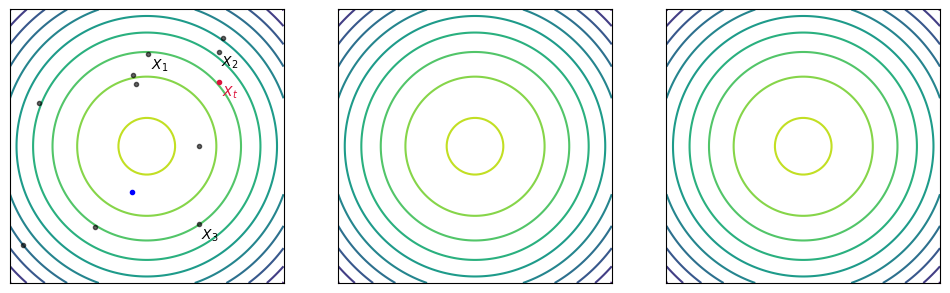

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

create_canvas(fig, ax1)
create_canvas(fig, ax2)
create_canvas(fig, ax3)

ax1.scatter(points_x, points_y, marker='.', color='black', alpha=0.6, zorder=100)
ax1.scatter(target_vector[0], target_vector[1], marker='.', color='crimson', zorder=100)
ax1.text(target_vector[0] + 1, target_vector[1] - 1, "$X_t$", color='crimson', ha='left', va='top')
ax1.text(x1[0] + 1, x1[1] - 1, "$X_1$", color='black', ha='left', va='top')
ax1.text(x2[0] + 1, x2[1] - 1, "$X_2$", color='black', ha='left', va='top')
ax1.text(x3[0] + 1, x3[1] - 1, "$X_3$", color='black', ha='left', va='top')
ax1.scatter(donor_vector[0], donor_vector[1], marker='.', color='blue', zorder=100)
ax1.text(donor_vector[0] + 1, donor_vector[1] - 1, "$V_i$", color='black', ha='left', va='top')
